<a href="https://colab.research.google.com/github/AndersonAraujoX/Rede_Complexa/blob/main/Rede_complexa_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Networkx - primeiros passos
inserir vértices
inserir nós
listar nos 
listar vértices
matriz de adjacencia

In [ ]:
!pip install algorithmx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math as math
from algorithmx import jupyter_canvas
from google.colab import output

In [ ]:
def clustering(vec):# Definições
  result=[]
  norm=nx.average_clustering(vec[0])
  for i in vec:
    result.append(nx.average_clustering(i)/norm)
  return result

In [ ]:
def path_length(vec):#Menos caminho
  result=[]
  norm=nx.average_shortest_path_length(vec[0])
  for i in vec:
    result.append(nx.average_shortest_path_length(i)/norm)
  return result

In [ ]:
def average_cycle(vec):# media do Ciclo
  result=[]
  for i in vec:
    result.append(nx.find_cycle(i))
  return result


In [ ]:
def calculate_entropy(vec):# Entropia
    entropy_list=[]
    for G in vec:
      nodes = G.number_of_nodes()
      degrees = dict(G.degree())
      max_degree = max(degrees.values())
      degree_counts = [0] * (max_degree + 1)

      for degree in degrees.values():
          degree_counts[degree] += 1

      entropy = 0
      for count in degree_counts:
          if count > 0:
              probability = count / nodes
              entropy += -probability * math.log2(probability)
      entropy_list.append(entropy)
    for i in range(len(entropy_list)):
      entropy_list[i]=entropy_list[i]/entropy_list[-1]
    return entropy_list

In [ ]:
def omega_small(vec):# omega
    omega_list=[]
    for i in vec:
      omega_list.append(nx.omega(i,niter=1))
    return omega_list

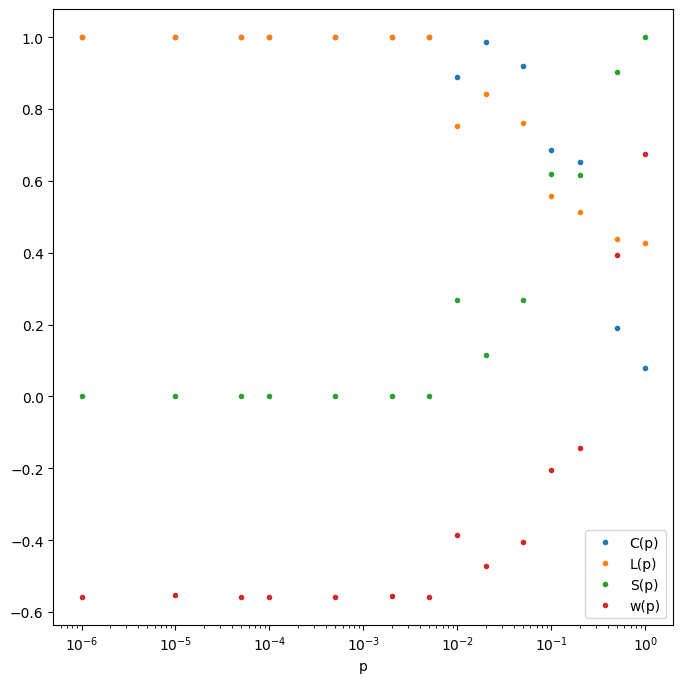

In [ ]:
Ga=[]

#condições do problema
n=50
k=5
lin=[0,10**(-6),10**(-5),5*10**(-5),10**(-4),5*10**(-4),2*10**(-3),5*10**(-3),10**(-2),2*10**(-2),5*10**(-2),10**(-1),2*10**(-1),5*10**(-1),1]#probabilidades

for i in lin:#gerar os grafos numa lista
  Ga.append(nx.watts_strogatz_graph(n,k,i))

#plots
plt.figure("Degree of a random graph", figsize=(8, 8))
plt.plot(lin,clustering(Ga),'.',label='C(p)')
plt.plot(lin,path_length(Ga),'.',label='L(p)')
plt.plot(lin,calculate_entropy(Ga),'.',label='S(p)')
plt.plot(lin,omega_small(Ga),'.',label='w(p)')
plt.xscale('log')
plt.xlabel("p")
#plt.ylabel("# of Nodes")
plt.legend()
plt.show()

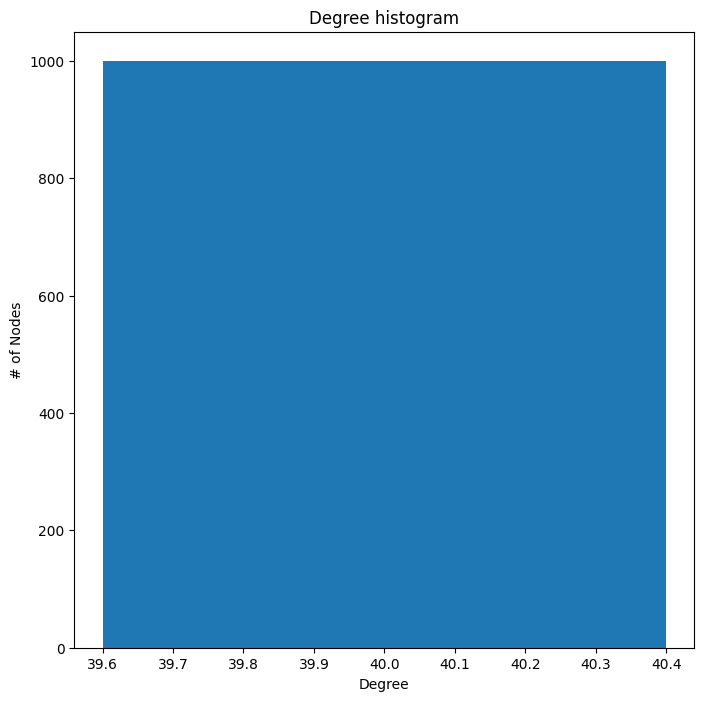

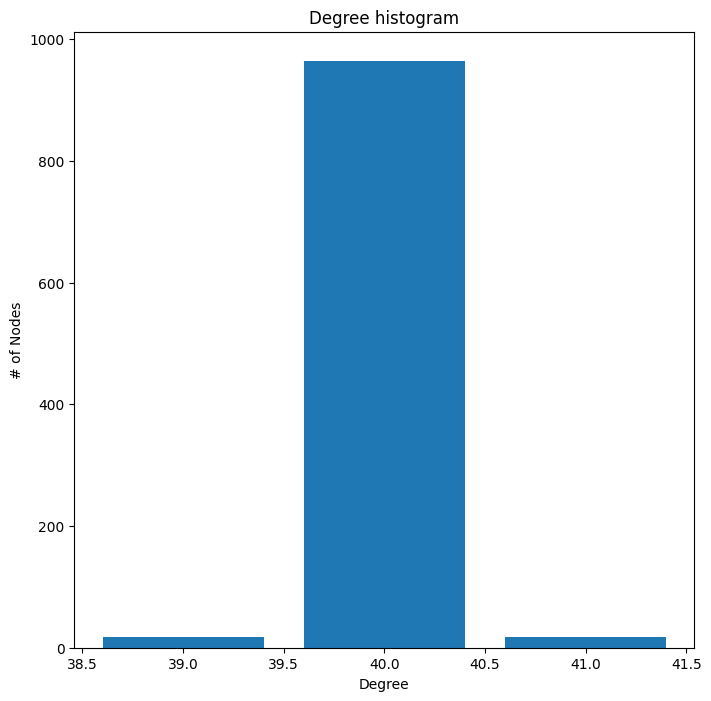

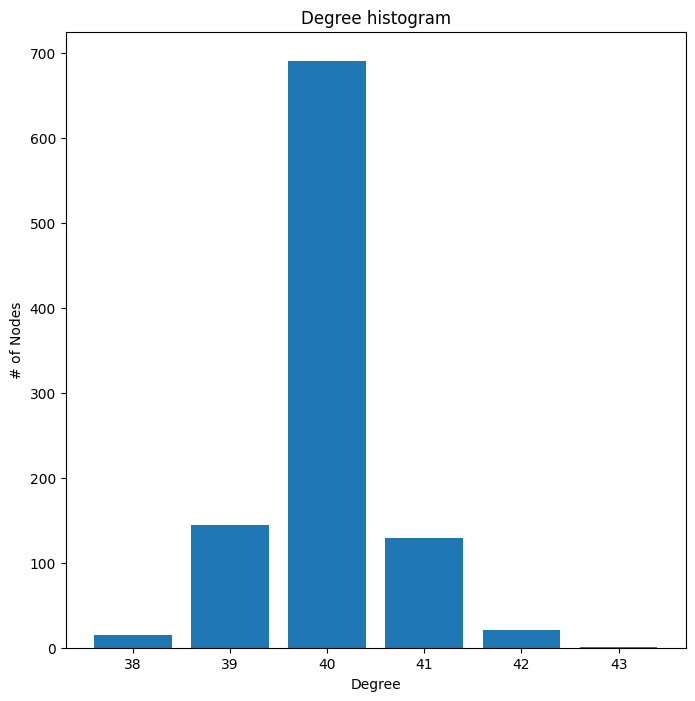

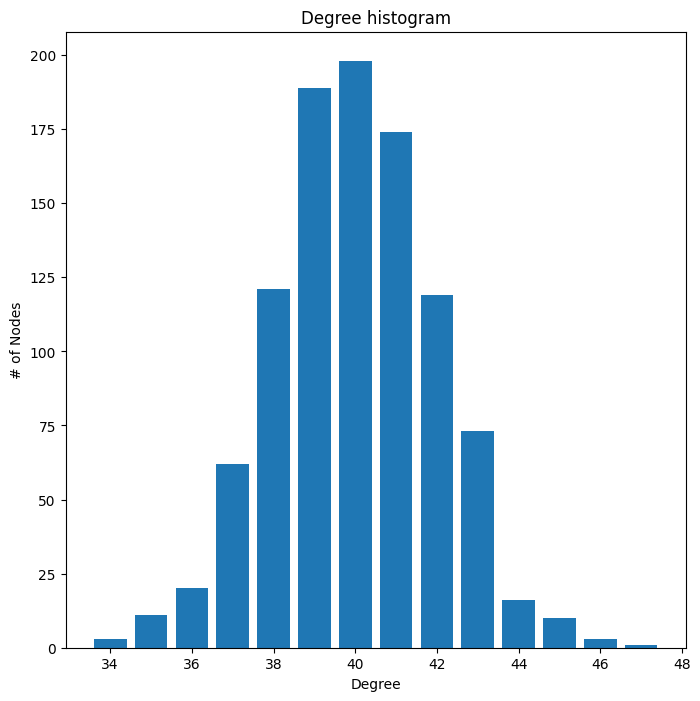

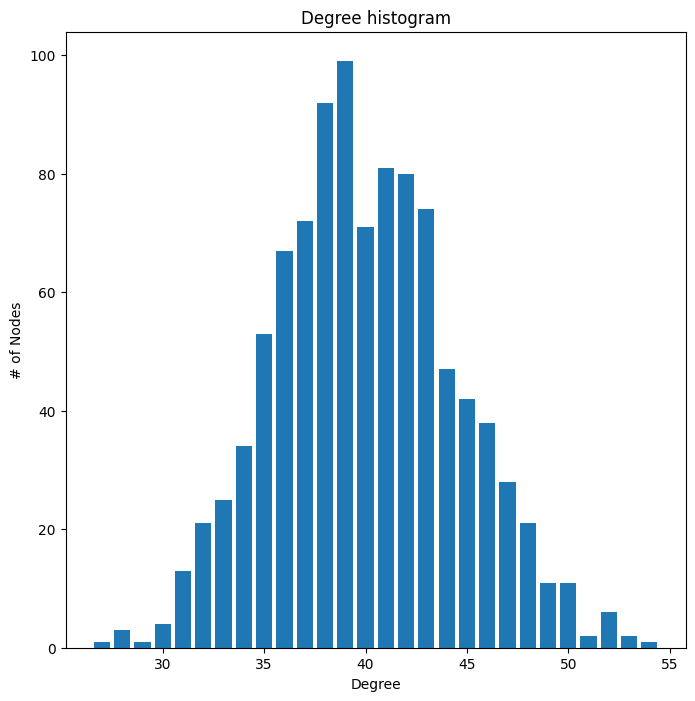

In [ ]:
 
 #Distribuição de Graus
 for i in [0,0.001,0.01,0.1,1]:
  Ga=nx.watts_strogatz_graph(n,k,i)

  degreeList =  list( (d for n, d in Ga.degree()) )

  import matplotlib.pyplot as plt

  fig = plt.figure("Degree of a random graph", figsize=(8, 8))
  # Create a gridspec for adding subplots of different sizes
  axgrid = fig.add_gridspec(5, 4)
  fig.tight_layout()


  #ax2 = fig.add_subplot(axgrid[3:, 2:])
  plt.bar(*np.unique(degreeList, return_counts=True))
  plt.title("Degree histogram")
  plt.xlabel("Degree")
  plt.ylabel("# of Nodes")
  plt.show()
  #skhvblsucaulicasulicgfasucb salcbscadgasgsdchsdchscdshhchdssdhdcfshdchc